In [1]:
%pip install -U scikit-learn
%pip install -U pydotplus
%pip install -U graphviz
%pip install -U six
%pip install -U xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("data_manual_v2.csv")
df = df.drop(["Tijdstempel"], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   programme          305 non-null    object 
 1   course_ML          305 non-null    int64  
 2   course_retrieval   305 non-null    int64  
 3   course_statistics  305 non-null    int64  
 4   course_databases   305 non-null    int64  
 5   gender             305 non-null    int64  
 6   ChatGPT            305 non-null    int64  
 7   birthday           305 non-null    object 
 8   students_in_room   305 non-null    int64  
 9   prev_answer_stand  305 non-null    int64  
 10  stress_level       305 non-null    int64  
 11  sports_per_week    305 non-null    int64  
 12  random_number      305 non-null    float64
 13  bed_time           305 non-null    object 
 14  good_day_(1)       305 non-null    int64  
 15  good_day_(2)       305 non-null    int64  
dtypes: float64(1), int64(12), 

# Transformations

- Transformations done manually
    - Grouped together labels of last two columns into labels: Work (0), Recreation (1), Health (2), Social (3), Weather (4), Food (5), Other (6)
    - Converted random numbers that were strings into numbers (if applicable)
        - Otherwise, picked a random integer in [0, 100]

### 1. Converting birthday to age

In [3]:
from datetime import date

ages = []
for i, row in df.iterrows():
    parts = row["birthday"].split("-")
    birthday = date(int(parts[0]), int(parts[1]), int(parts[2]))
    now = date.today()
    age = now.year - birthday.year - ((now.month, now.day) < (birthday.month, birthday.day))
    ages.append(age)
df["birthday"] = ages
df.rename(columns={"birthday": "age"}, inplace=True)
df

,programme,course_ML,course_retrieval,course_statistics,course_databases,gender,ChatGPT,age,students_in_room,prev_answer_stand,stress_level,sports_per_week,random_number,bed_time,good_day_(1),good_day_(2)
0,AI,1,0,1,0,1,8,23,100,0,50,1,1.0,4:30:00,0,3
1,AI,1,0,1,0,5,1,25,319,0,100,0,69.0,23:30:00,6,6
2,AI,0,0,0,0,1,8,25,600,0,60,2,42.0,23:00:00,5,2
3,AI,0,0,1,0,2,0,25,220,0,20,5,17.0,23:30:00,1,3
4,Data Mining,1,1,1,1,1,1,26,100,0,50,5,12.0,23:00:00,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,CS,1,1,0,1,1,8,22,200,0,70,10,67.0,1:00:00,5,4
301,Exch,0,0,0,1,1,0,26,400,0,70,0,13.0,1:09:00,0,0
302,CS,1,0,1,0,2,0,26,150,0,10,5,18.0,4:00:00,3,0
303,AI,1,0,1,1,5,0,26,150,1,10,5,69.0,4:00:00,6,6


### 2. Convert bedtime to seconds

In [4]:
bedtimes = []
for i, row in df.iterrows():
    parts = row["bed_time"].split(":")
    bedtime = int(parts[0])*3600 + int(parts[1])*60 + int(parts[2])
    bedtimes.append(bedtime)
df["bed_time"] = bedtimes
df

,programme,course_ML,course_retrieval,course_statistics,course_databases,gender,ChatGPT,age,students_in_room,prev_answer_stand,stress_level,sports_per_week,random_number,bed_time,good_day_(1),good_day_(2)
0,AI,1,0,1,0,1,8,23,100,0,50,1,1.0,16200,0,3
1,AI,1,0,1,0,5,1,25,319,0,100,0,69.0,84600,6,6
2,AI,0,0,0,0,1,8,25,600,0,60,2,42.0,82800,5,2
3,AI,0,0,1,0,2,0,25,220,0,20,5,17.0,84600,1,3
4,Data Mining,1,1,1,1,1,1,26,100,0,50,5,12.0,82800,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,CS,1,1,0,1,1,8,22,200,0,70,10,67.0,3600,5,4
301,Exch,0,0,0,1,1,0,26,400,0,70,0,13.0,4140,0,0
302,CS,1,0,1,0,2,0,26,150,0,10,5,18.0,14400,3,0
303,AI,1,0,1,1,5,0,26,150,1,10,5,69.0,14400,6,6


###  3. Normalize numerical features

In [5]:
def normalize_column(df, names):
    for name in names:
        df[name] = (df[name] - df[name].min()) / (df[name].max() - df[name].min())

def standardize_column(df, names):
    for name in names:
        df[name] = (df[name] - df[name].mean()) / (df[name].std())
        
normalize_column(df, ["age", "students_in_room", "stress_level", "sports_per_week", "random_number", "bed_time"])
df

,programme,course_ML,course_retrieval,course_statistics,course_databases,gender,ChatGPT,age,students_in_room,prev_answer_stand,stress_level,sports_per_week,random_number,bed_time,good_day_(1),good_day_(2)
0,AI,1,0,1,0,1,8,0.142857,0.079402,0,0.5,0.018868,2.365812e-203,0.187630,0,3
1,AI,1,0,1,0,5,1,0.238095,0.331415,0,1.0,0.000000,4.122457e-202,0.979847,6,6
2,AI,0,0,0,0,1,8,0.238095,0.654776,0,0.6,0.037736,2.579536e-202,0.958999,5,2
3,AI,0,0,1,0,2,0,0.238095,0.217491,0,0.2,0.094340,1.150905e-202,0.979847,1,3
4,Data Mining,1,1,1,1,1,1,0.285714,0.079402,0,0.5,0.094340,8.651787e-203,0.958999,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,CS,1,1,0,1,1,8,0.095238,0.194476,0,0.7,0.188679,4.008166e-202,0.041696,5,4
301,Exch,0,0,0,1,1,0,0.285714,0.424626,0,0.7,0.000000,9.223240e-203,0.047950,0,0
302,CS,1,0,1,0,2,0,0.285714,0.136939,0,0.1,0.094340,1.208050e-202,0.166782,3,0
303,AI,1,0,1,1,5,0,0.285714,0.136939,1,0.1,0.094340,4.122457e-202,0.166782,6,6


# Feature Selection

[0.03225715 0.03172447 0.02543968 0.0377159  0.04927359 0.05043785
 0.08618766 0.13893209 0.00720573 0.12495134 0.11355235 0.00302575
 0.12279118 0.09049214 0.08601314]
['course_ML', 'course_retrieval', 'course_statistics', 'course_databases', 'gender', 'ChatGPT', 'age', 'students_in_room', 'prev_answer_stand', 'stress_level', 'sports_per_week', 'random_number', 'bed_time', 'good_day_(1)', 'good_day_(2)']


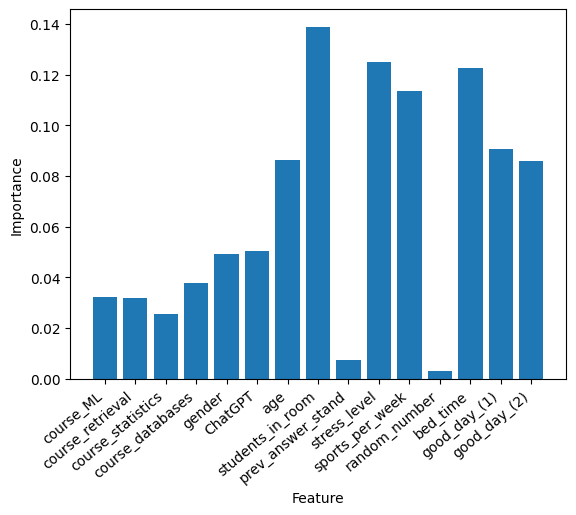

,age,students_in_room,stress_level,sports_per_week,bed_time,good_day_(1)_0,good_day_(1)_1,good_day_(1)_2,good_day_(1)_3,good_day_(1)_4,good_day_(1)_5,good_day_(1)_6,good_day_(2)_0,good_day_(2)_1,good_day_(2)_2,good_day_(2)_3,good_day_(2)_4,good_day_(2)_5,good_day_(2)_6
153,0.095238,0.424626,0.90,0.075472,0.979847,0,1,0,0,0,0,0,0,0,1,0,0,0,0
89,0.238095,0.539701,0.05,0.113208,0.083391,0,0,0,1,0,0,0,0,0,0,0,0,0,1
224,0.190476,0.252014,0.30,0.113208,0.020848,0,1,0,0,0,0,0,0,0,0,0,1,0,0
218,0.095238,0.424626,0.70,0.075472,0.062543,0,0,0,0,1,0,0,0,0,0,1,0,0,0
188,0.142857,0.884925,1.00,0.150943,0.083391,1,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.095238,0.194476,0.99,0.018868,0.083391,0,0,0,0,1,0,0,0,1,0,0,0,0,0
112,0.238095,0.447641,0.30,0.113208,0.017373,0,0,0,0,0,1,0,0,0,0,0,1,0,0
275,0.238095,0.309551,0.25,0.037736,0.020848,0,0,0,1,0,0,0,0,0,0,0,1,0,0
93,0.238095,0.291139,0.05,0.037736,0.979847,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

label = df["programme"]
features = df.loc[:, df.columns != "programme"]
# features = features.drop(["course_ML", "course_statistics", "course_databases", "course_retrieval", "gender", "good_day_(1)", "good_day_(2)", "ChatGPT", "prev_answer_stand", "random_number"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3)
# print(x_train.info())

sel = SelectFromModel(RandomForestClassifier(n_estimators=1000))
sel.fit(x_train, y_train)


print(sel.estimator_.feature_importances_)
print(x_train.columns.values.tolist())

plt.bar(x_train.columns.values.tolist(), sel.estimator_.feature_importances_)
plt.xticks(rotation=40, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

selected_features = x_train.columns[(sel.get_support())]
x_train = x_train[selected_features]
x_test = x_test[selected_features]

def one_hot_encode(df, col_name):
    one_hot = pd.get_dummies(df[col_name], prefix=col_name, prefix_sep="_")
    df = df.drop(col_name, axis=1)
    df = df.join(one_hot)
    return df

x_train = one_hot_encode(x_train, "good_day_(1)")
x_train = one_hot_encode(x_train, "good_day_(2)")
x_test = one_hot_encode(x_test, "good_day_(1)")
x_test = one_hot_encode(x_test, "good_day_(2)")
x_train

In [7]:
final = df.loc[:, ["programme", "age", "students_in_room", "stress_level", "sports_per_week", "bed_time", "good_day_(1)", "good_day_(2)"]]
final = one_hot_encode(final, "good_day_(1)")
final = one_hot_encode(final, "good_day_(2)")
final.to_csv("classification_dataset.csv")
final

,programme,age,students_in_room,stress_level,sports_per_week,bed_time,good_day_(1)_0,good_day_(1)_1,good_day_(1)_2,good_day_(1)_3,good_day_(1)_4,good_day_(1)_5,good_day_(1)_6,good_day_(2)_0,good_day_(2)_1,good_day_(2)_2,good_day_(2)_3,good_day_(2)_4,good_day_(2)_5,good_day_(2)_6
0,AI,0.142857,0.079402,0.5,0.018868,0.187630,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,AI,0.238095,0.331415,1.0,0.000000,0.979847,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,AI,0.238095,0.654776,0.6,0.037736,0.958999,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,AI,0.238095,0.217491,0.2,0.094340,0.979847,0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Data Mining,0.285714,0.079402,0.5,0.094340,0.958999,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300,CS,0.095238,0.194476,0.7,0.188679,0.041696,0,0,0,0,0,1,0,0,0,0,0,1,0,0
301,Exch,0.285714,0.424626,0.7,0.000000,0.047950,1,0,0,0,0,0,0,1,0,0,0,0,0,0
302,CS,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,1,0,0,0,1,0,0,0,0,0,0
303,AI,0.285714,0.136939,0.1,0.094340,0.166782,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [8]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
import random

n = random.randint(1, 1000)
print(f"tree {n}")

print(selected_features)
tree = sel.estimator_[571]
export_graphviz(tree, out_file="tree.dot",
                feature_names=features.columns.values,
                class_names=label.unique(),
                rounded=True, proportion=False, precision=3, 
                filled=False, max_depth=2)



tree 22
Index(['age', 'students_in_room', 'stress_level', 'sports_per_week',
       'bed_time', 'good_day_(1)', 'good_day_(2)'],
      dtype='object')


[0.13998789 0.07335649 0.12700866 0.05764857 0.05736119 0.09589455
 0.05659741 0.05183995 0.08036163 0.05841944 0.0505942  0.
 0.0576606  0.05277827 0.04049117]


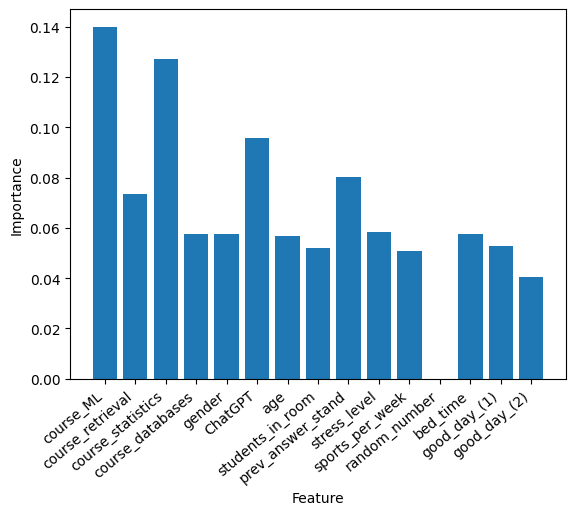

,course_ML,course_retrieval,course_statistics,ChatGPT,prev_answer_stand,stress_level,bed_time
104,1,0,1,1,0,0.70,0.055594
75,1,0,1,0,0,0.20,0.938151
62,1,0,1,0,0,0.17,0.083391
109,1,0,1,1,0,1.00,0.020848
177,0,0,1,8,0,1.00,0.938151
...,...,...,...,...,...,...,...
176,0,0,1,0,0,0.90,0.020848
111,0,0,1,1,0,0.10,0.958999
161,1,1,1,1,0,0.20,0.958999
258,1,1,1,1,0,0.17,0.027797


In [9]:
label = df["programme"]
features = df.loc[:, df.columns != "programme"]
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3)

model = XGBClassifier(n_estimators=500, learning_rate=0.1)
model.fit(x_train, LabelEncoder().fit_transform(y_train))

print(model.feature_importances_)

best_features = [True if i in np.argsort(model.feature_importances_)[-7:] else False for i, v in enumerate(features)]
selected_features = x_train.columns[(best_features)]
x_train = x_train[selected_features]
x_test = x_test[selected_features]

plt.bar(features.columns.values.tolist(), model.feature_importances_)
plt.xticks(rotation=40, ha='right')
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

x_test

In [10]:
from sklearn.feature_selection import chi2

cat_df = df.drop(["age", "students_in_room", "stress_level", "bed_time", "sports_per_week", "random_number"], axis=1)
cat_df["gender"] -= 1
cat_df["ChatGPT"] = cat_df["ChatGPT"].replace({8: 2})
cat_df

x = cat_df.drop(["programme"], axis=1)
y = cat_df["programme"]
y = LabelEncoder().fit_transform(y)
f_score = chi2(x, y)

p_value = pd.Series(f_score[1], index=x.columns)
p_value.sort_values(ascending=True, inplace=True)
p_value

good_day_(1)         0.295131
course_databases     0.305600
gender               0.498629
good_day_(2)         0.736568
course_retrieval     0.794333
course_ML            0.843409
ChatGPT              0.980806
prev_answer_stand    0.991073
course_statistics    0.999780
dtype: float64

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

label = df["programme"]
features = df.loc[:, df.columns != "programme"]
features = features.drop(["course_ML", "course_statistics", "course_databases", "course_retrieval", "gender", "good_day_(1)", "good_day_(2)", "ChatGPT", "prev_answer_stand", "random_number"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3)


# Create KNN model
knn = KNeighborsClassifier()

# Define the hyperparameters to be tuned
param_grid = {
    'n_neighbors': range(1, 40),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and their corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)
    
# Evaluate the performance on the test set using the best hyperparameters
y_pred = grid_search.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)
print(y_test)
print(y_pred)

x_train

C:\Users\koenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'n_neighbors': 28, 'p': 2, 'weights': 'uniform'}
Accuracy score: 0.4323366555924696
Test set accuracy: 0.44565217391304346
84     Comp Sci
10          QRM
297          CS
76           BA
228          BA
         ...   
279          CS
59      Finance
214          CS
262          AI
232          BA
Name: programme, Length: 92, dtype: object
['AI' 'CS' 'AI' 'AI' 'AI' 'CS' 'AI' 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'CS'
 'AI' 'CS' 'CS' 'CS' 'CS' 'AI' 'CS' 'CS' 'CS' 'AI' 'AI' 'CS' 'AI' 'CS'
 'AI' 'AI' 'CS' 'CS' 'CS' 'CS' 'AI' 'AI' 'AI' 'CS' 'CS' 'CS' 'CS' 'CS'
 'CS' 'AI' 'AI' 'AI' 'CS' 'AI' 'CS' 'CS' 'AI' 'CS' 'AI' 'AI' 'CS' 'AI'
 'CS' 'CS' 'CS' 'AI' 'CS' 'AI' 'CS' 'CS' 'AI' 'AI' 'CS' 'AI' 'CS' 'CS'
 'CS' 'AI' 'CS' 'AI' 'CS' 'AI' 'CS' 'CS' 'CS' 'CS' 'AI' 'CS' 'AI' 'CS'
 'CS' 'CS' 'CS' 'CS' 'CS' 'CS' 'AI' 'CS']


,age,students_in_room,stress_level,sports_per_week,bed_time
285,0.190476,0.367089,0.01,0.037736,0.041696
203,0.190476,0.445339,0.18,0.056604,0.917304
167,0.238095,0.252014,0.50,0.018868,0.083391
19,0.238095,0.827388,0.77,0.113208,0.020848
127,0.238095,0.589183,0.15,0.113208,0.020848
...,...,...,...,...,...
211,0.238095,0.424626,0.30,0.113208,0.083391
146,0.095238,0.289988,0.08,0.169811,0.958999
33,0.190476,0.539701,0.90,0.150943,0.000000
180,0.142857,0.194476,0.30,0.056604,0.000000
